Course Name: Pattern Recognition Lab <br>
Course No : CSE 4214 <br>
Experiment Name: Implementing the Perceptron algorithm for finding the weights of a Linear Discriminant function <br>
Name: Md. Reasad Zaman Chowdhury <br>
Section: A1 <br>
Student ID: 160104004 <br>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.txt to train.txt


### Task 1: Plot All Sample Points

In [3]:
#Reading training and testing dataset
df_train = pd.read_csv('train.txt', sep=" " ,  header = None, dtype = 'float64')
print(df_train)

#converting into numpy array
np_train = df_train.values

     0    1    2
0  1.0  1.0  1.0
1  1.0 -1.0  1.0
2  2.0  2.5  2.0
3  0.0  2.0  2.0
4  2.0  3.0  2.0
5  4.0  5.0  1.0


In [4]:
#separating class
w1 = df_train[df_train[2] == 1]
w2 = df_train[df_train[2] == 2]

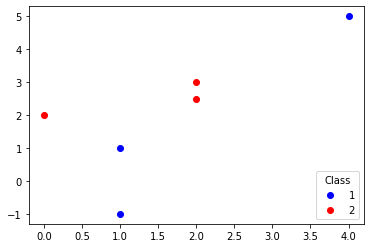

In [5]:
#scatter plot according to the class label
fig, ax = plt.subplots()
ax.scatter(w1[0], w1[1], color='blue', label='1')
ax.scatter(w2[0], w2[1], color='red', label='2')
ax.legend(title='Class', loc='lower right')
plt.show()

### Task 2: Generate High Dimensional Sample Points and Normalize Any of the Class

In [6]:
def phi_function_and_normalization(arr):
    """
    converts a lower dimention feature vector to a higher dimension and negate the samples of class 2
    """
    
    x1_2 = arr[0] ** 2
    x2_2 = arr[1] ** 2
    x1 = arr[0]
    x2 = arr[1]
    x1_x2 = x1 * x2
    
    if arr[2] == 1:
        return  np.array([[x1_2, x2_2, x1_x2, x1, x2, 1]])
    else:
        return  np.array([[x1_2, x2_2, x1_x2, x1, x2, 1]]) * -1

In [7]:
#apply phi function and normalization to training samples

#creating empty array
y = np.empty((0,6), float)
   
for i in range(len(np_train)):
    temp = phi_function_and_normalization(np_train[i])
    y = np.append(y, temp, axis = 0)
        
print(y)     
        

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]
 [16.   25.   20.    4.    5.    1.  ]]


### Task 3: Use Perceptron Algorithm (both one at a time and many at a time) for finding the weight coefficients

In [8]:
def one_at_a_time(y, w, alpha):
    count = 0
    itr = 0
    len_y = y.shape[0]
    
    while count != len_y:
        itr += 1
        count = 0
        
        for i in range(len_y):
            g = np.dot(y[i], np.transpose(w))
            
            if g <= 0:
                w = w + alpha * y[i]
            else:
                count += 1
       
    return itr        

In [9]:
def many_at_a_time(y, w, alpha):
    count = 0
    itr = 0
    len_y = y.shape[0]
    
    while count != len_y:
        itr += 1
        count = 0
        y_miss = np.zeros((1, y.shape[1]))
        
        for i in range(len_y):
            g = np.dot(y[i], np.transpose(w))
            
            if g <= 0:
                y_miss = y_miss + y[i]
            else:
                count += 1
        w = w + alpha * y_miss
        
    return itr        

### Task 4: Obtain and Visualize the Performance of Different Perceptron algorithm for Different Combination of Weight Initialization, Learning Rate

In [10]:
np.random.seed(2)

# weight initializations
w_ones = np.ones((1, y.shape[1]))
w_zeros = np.zeros((1, y.shape[1]))
w_random = np.random.random((1, y.shape[1]))

# learning rate 
alphas = np.arange(0.1, 1.1, 0.1)

#list for output
one_ones, one_zeros, one_random, many_ones, many_zeros, many_random = [], [], [], [], [], []

for alpha in alphas:
    one_ones.append( one_at_a_time(y, w_ones, alpha) )
    one_zeros.append( one_at_a_time(y, w_zeros, alpha) )
    one_random.append( one_at_a_time(y, w_random, alpha) )
    many_ones.append( many_at_a_time(y, w_ones, alpha) )
    many_zeros.append( many_at_a_time(y, w_zeros, alpha) )
    many_random.append( many_at_a_time(y, w_random, alpha) )
    
print('one at a time with wights all ones:', one_ones)
print('one at a time with wights all zeros:', one_zeros)
print('one at a time with wights randomly initialized:', one_random)
print('many at a time with wights all ones:', many_ones)
print('many at a time with wights all zeros:', many_zeros)
print('many at a time with wights randomly initialized:', many_random)

one at a time with wights all ones: [6, 147, 149, 149, 141, 157, 136, 136, 140, 141]
one at a time with wights all zeros: [141, 141, 141, 141, 141, 141, 141, 141, 141, 141]
one at a time with wights randomly initialized: [144, 154, 141, 153, 157, 157, 135, 136, 136, 136]
many at a time with wights all ones: [102, 104, 91, 116, 105, 114, 91, 91, 105, 93]
many at a time with wights all zeros: [105, 105, 92, 105, 92, 105, 105, 105, 105, 92]
many at a time with wights randomly initialized: [95, 87, 92, 90, 88, 139, 138, 116, 118, 97]


In [11]:
#function for ploting the bar chart
def plot_bar_chart(x, y1, y2, init_type):
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x, y1, width=0.03, align='center', label='One at a time')
    ax.bar(x+0.03, y2, width=0.03, align='center', label='Many at a time')

    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations')
    plt.title('Perceptron Comparison: '+init_type)
    plt.xticks(x)
    plt.legend()
    plt.show()

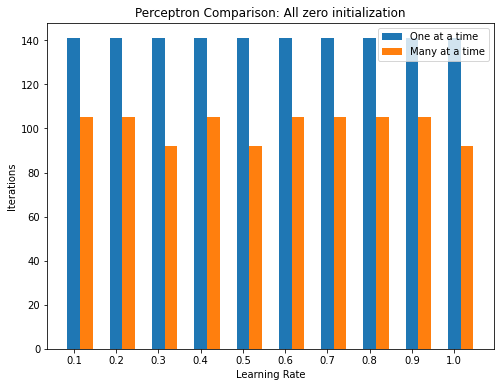

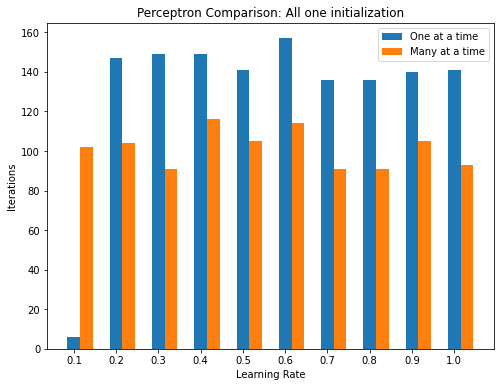

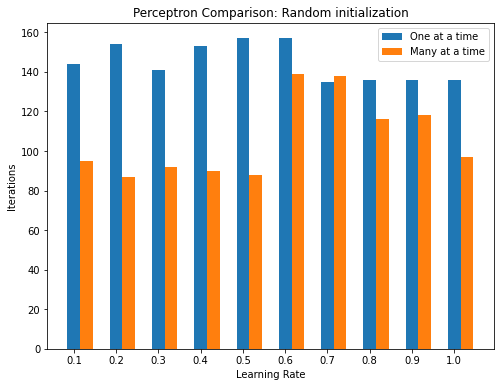

In [12]:
#plotting bar charts

plot_bar_chart(alphas, one_zeros, many_zeros, 'All zero initialization')
plot_bar_chart(alphas, one_ones, many_ones, 'All one initialization')
plot_bar_chart(alphas, one_random, many_random, 'Random initialization')